## qDESS T2 mapping
###### Author: Zimu Huo
###### Date: 03.2022


The code is **translated** from Akshay Chaudhari's code which is originally in Matlab scripts

Special thanks to Pete and Neal for sending me the resources 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: B Sveinsson et al. 
    Title: A Simple Analytic Method for Estimating T2 in the Knee from DESS
    Link: https://www.ncbi.nlm.nih.gov/pubmed/28017730
    

         

In [2]:
import os 
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import pydicom as dcm
import math
from numpy import sqrt, sin, cos, pi, exp, log
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
GlArea = 30*1e2; 
data = Path('src/spoil30')
dirs = list(data.glob('**/*.IMA'))

In [4]:
file0 = dcm.read_file(dirs[0]) 
f = file0.pixel_array
[height, width] = f.shape
N = len(dirs)
print(height, width, N)

420 416 240


In [5]:
spl_dur = 4.8e-3
T1 = 1.2
D = 1.25e-9 #diffusivity of sciatic nerve @ 7T**
TR = file0.RepetitionTime*1e-3
TE = file0.EchoTime*1e-3
alpha = file0.FlipAngle
Gl = GlArea/(spl_dur*1e6)*100
gamma = 4258*2*np.pi
dkL = gamma*Gl*spl_dur
sind = (math.sin(math.radians(alpha/2)))
k = ((math.sin(math.radians(alpha/2))))**2*((1 + exp(-TR/T1 - TR*dkL**2*D)))/(1 - (math.cos(math.radians(alpha)))*exp(-TR/T1 - TR*dkL**2*D))
c1 = (TR-spl_dur/3)*dkL**2*D
print(TR,TE,alpha,Gl, k , c1)
# del file0
# del f

0.0225 0.00631 13 62.5 0.5580519928885466 0.0016829447534083863


In [6]:
images = np.zeros([height,width,N])

for index,f in enumerate (dirs):
    image = dcm.read_file(f).pixel_array
    images[:,:,index] = image

dess = np.zeros([height,width,int(N/2),2])
dess[:,:,:,0] = images[:,:,0:int(N/2)]
dess[:,:,:,1] = images[:,:,int(N/2):]


In [7]:
mask = np.ones([height,width,int(N/2)])
ratio = np.zeros([height, width, int(N/2)])
ratio = mask*dess[:,:,:,1]/dess[:,:,:,0];
t2map = (-2000*(TR-TE)/(log(abs(ratio)/k)+c1));

t2map[t2map <=0] = np.NaN;
t2map[t2map > 100] = np.NaN;

/var/folders/5d/6p36mvb505x5j7b_90jtxdsr0000gn/T/ipykernel_53053/1809028751.py:3: RuntimeWarning: invalid value encountered in true_divide
  ratio = mask*dess[:,:,:,1]/dess[:,:,:,0];


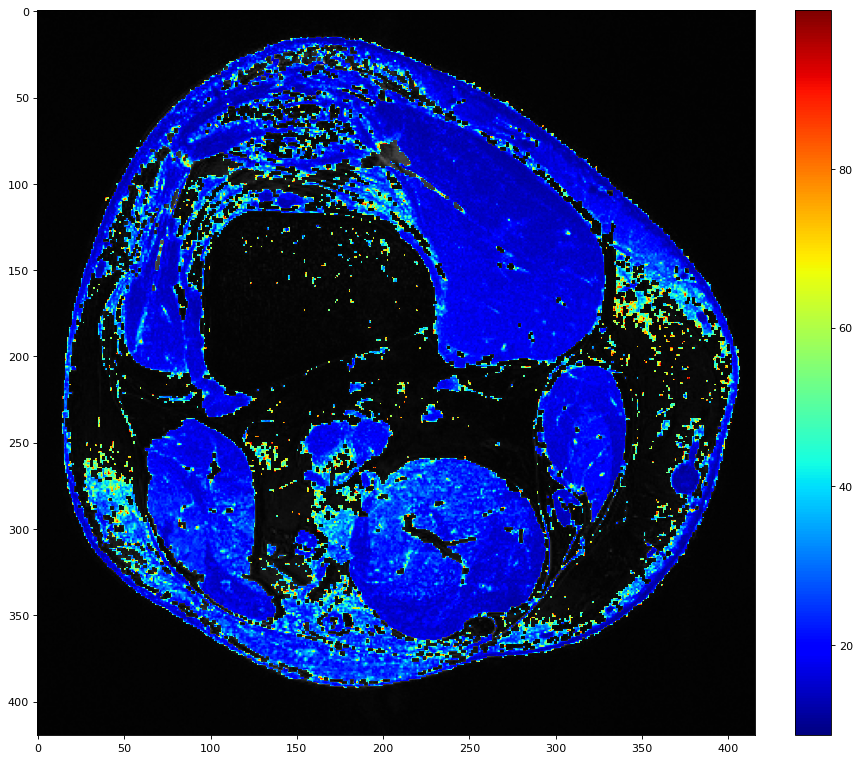

In [8]:
i = 80
plt.figure(figsize=(16, 12), dpi=80)
plt.imshow(images[:,:,i],cmap = 'gray')
tf = plt.imshow(t2map[:,:,i], cmap ='jet')
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.show()

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.figure(figsize=(12, 8), dpi=80)
def show(slice):
   
    slice = int(slice)
    plt.imshow(images[:,:,slice],cmap = 'gray')
    tf = plt.imshow(t2map[:,:,slice], cmap ='jet')
    plt.colorbar(tf, fraction=0.046, pad=0.04)

interact(show, slice = widgets.FloatSlider(value=80,
                                               min=0,
                                               max=119,
                                               step=1))

<Figure size 960x640 with 0 Axes>

interactive(children=(FloatSlider(value=80.0, description='slice', max=119.0, step=1.0), Output()), _dom_class…

<function __main__.show(slice)>

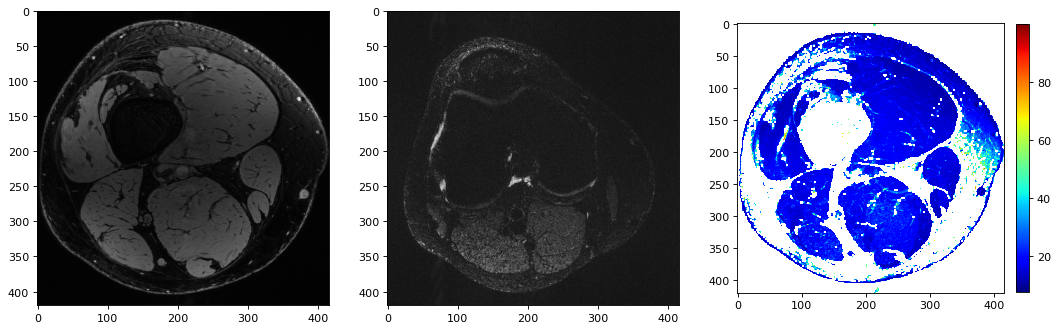

In [13]:
i = 60
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(131)
plt.imshow(images[:,:,i],cmap = 'gray')
plt.subplot(132)
plt.imshow(images[:,:,i+11],cmap = 'gray')
plt.subplot(133)
tf = plt.imshow(t2map[:,:,i], cmap ='jet')
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.show()